# Understanding Descriptive Statistics

Import the necessary libraries here:

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [26]:
def roll_dice(t=10):
    a = np.arange(1, 7)  # Possible outcomes of rolling a dice (1 to 6)
    dice_results = np.random.choice(a, t)  # Simulate rolling the dice t times
    dice = pd.DataFrame(dice_results, columns=["Results"])  
    dice.index = np.arange(1, len(dice) + 1)  # Set index to represent rolls
    dice.index.name = "Roll"
    return dice

In [27]:
dice_df = roll_dice()
dice_df

,Results
Roll,
1,4
2,2
3,6
4,6
5,6
6,5
7,1
8,3
9,5


#### 2.- Plot the results sorted by value.

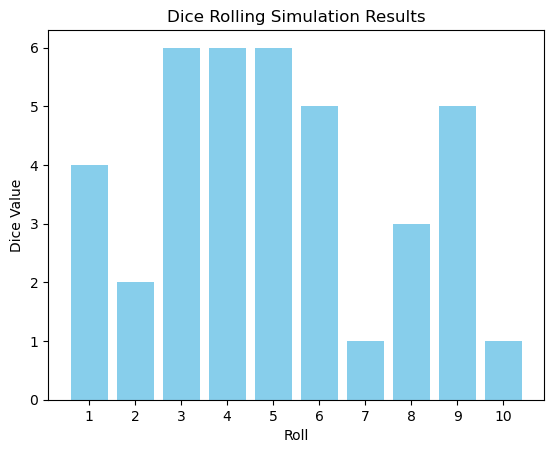

In [28]:
plt.bar(dice_df.index, dice_df["Results"], color="skyblue")
plt.xlabel("Roll")
plt.ylabel("Dice Value")
plt.title("Dice Rolling Simulation Results")
plt.xticks(dice_df.index)
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [30]:
frequency = dice_df["Results"].value_counts().sort_index()
frequency

1    2
2    1
3    1
4    1
5    2
6    3
Name: Results, dtype: int64

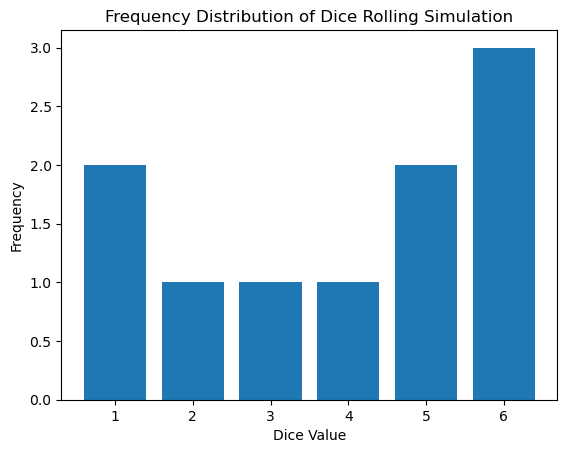

In [31]:
plt.bar(frequency.index, frequency.values)
plt.xlabel("Dice Value")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Dice Rolling Simulation")
plt.xticks(frequency.index)
plt.show()

In [ ]:
"""
The 1st plot shows us the results of rolling the dice 10 times, sorted by their values. 
Each bar represents a roll, and the height of the bar corresponds to the value rolled. 
This plot provides a visual representation of the individual outcomes of each roll.

The 2nd plot, which represents the frequency distribution, displays the number of occurrences (frequency) for each possible dice value. 
Each bar in this plot represents one of the six possible dice values, and the height of the bar indicates how many times that value appeared in the 10 rolls.

"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [37]:
def mean_dice(data):
    mean = data.sum() / len(data)
    return mean

result_column = dice_df['Results']
mean_value = mean_dice(result_column)
mean_value

3.9

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [38]:
freq_distribution = dice_df["Results"].value_counts()
sum_values = 0
total_count = 0

for value, count in freq_distribution.items():
    sum_values += value * count
    total_count += count

mean_value = sum_values / total_count

print("Frequency Distribution:")
print(freq_distribution)
print(f"The mean is {mean_value}")

Frequency Distribution:
6    3
5    2
1    2
4    1
2    1
3    1
Name: Results, dtype: int64
The mean is 3.9


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [53]:
def median_dice(data):
    sorted_data = sorted(data)
    n = len(sorted_data)
 
    if n % 2 == 1:
        median_index = n // 2
        median_value = sorted_data[median_index]
    else:
        upper_median_index = n // 2
        lower_median_index = upper_median_index - 1
        median_value = (sorted_data[lower_median_index] + sorted_data[upper_median_index]) / 2.0
    
    return median_value

In [54]:
median_dice = median_dice(dice_df["Results"])

print(f"The median is {median_dice}")

The median is 4.5


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [56]:
def median_dice(data):
    sorted_data = sorted(data)
    n = len(sorted_data)
 
    if n % 2 == 1:
        median_index = n // 2
        median_value = sorted_data[median_index]
    else:
        upper_median_index = n // 2
        lower_median_index = upper_median_index - 1
        median_value = (sorted_data[lower_median_index] + sorted_data[upper_median_index]) / 2.0
    
    return median_value


def quartiles_dice(data):
    sorted_data = sorted(data)
    n = len(sorted_data)
    
    q1 = median_dice(sorted_data[:n // 2])
    q2 = median_dice(sorted_data)
    q3 = median_dice(sorted_data[n // 2:]) if n % 2 == 0 else median_dice(sorted_data[n // 2 + 1:])
    q4 = sorted_data[-1] 
    return q1, q2, q3, q4


result_column = dice_df["Results"]
q1, q2, q3, q4 = quartiles_dice(result_column)

print(f"The first quartile is {q1}")
print(f"The second quartile is {q2}")
print(f"The third quartile is {q3}")
print(f"The fourth quartile is {q4}")

The first quartile is 2
The second quartile is 4.5
The third quartile is 6
The fourth quartile is 6


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [63]:
data = pd.read_csv("roll_the_dice_hundred.csv")
data

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


C:\Users\USER\AppData\Local\Temp\ipykernel_14744\2676058639.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sorted_values)


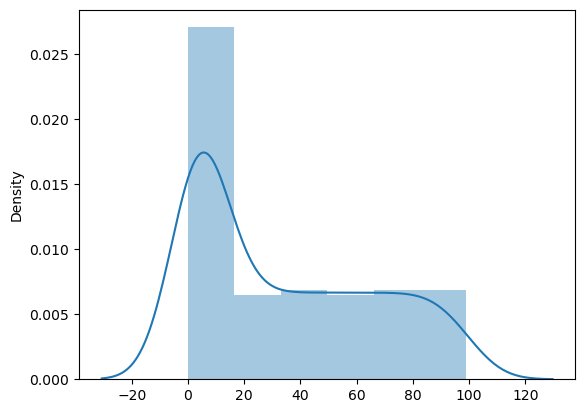

In [66]:
sorted_values = data.sort_values(by = "value", ascending = False)

sns.distplot(sorted_values)
plt.show()

In [ ]:
"""
your comments here
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [73]:
def mean_dice(data):
    mean = data.sum() / len(data)
    return mean

print("The value of mean is:", mean_dice(data["value"]))

The value of mean is: 3.74


#### 3.- Now, calculate the frequency distribution.


In [75]:
freq_distribution = data["value"].value_counts()
freq_distribution

6    23
4    22
2    17
3    14
1    12
5    12
Name: value, dtype: int64

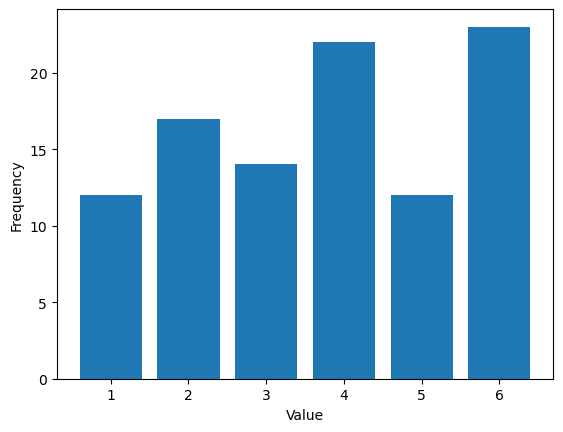

In [77]:
plt.bar(freq_distribution.index, freq_distribution.values)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

(array([12.,  0., 17.,  0., 14.,  0., 22.,  0., 12., 23.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

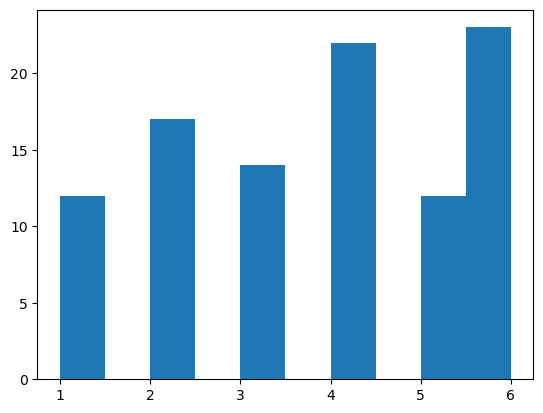

In [78]:
plt.hist(data["value"])

In [ ]:
"""
In the dataset, we observe that the values 6, 4, and 2 have the highest frequencies, with occurrences of 23, 22, and 17 respectively. 
The mean value across the dataset is calculated  3.74. 
This mean, along with the distribution characteristics, suggests that the data is slightly skewed towards higher values, indicating a weak positive skewness.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

1    175
3    175
4    168
2    167
6    166
5    149
Name: value, dtype: int64


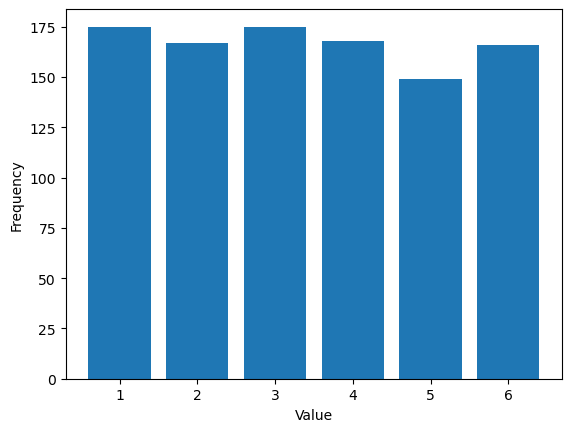

In [87]:
data = pd.read_csv("roll_the_dice_thousand.csv")
data

freq_distribution = data["value"].value_counts()
print(freq_distribution)

plt.bar(freq_distribution.index, freq_distribution.values)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
"""
The frequency change because we add more values 
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

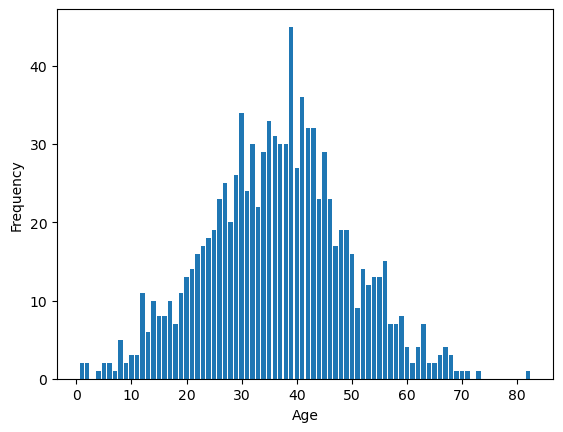

In [89]:
ages_population = pd.read_csv("ages_population.csv")
ages_population

freq_distribution = ages_population["observation"].value_counts()

plt.bar(freq_distribution.index, freq_distribution.values)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [90]:

mean = ages_population["observation"].mean()
print(f"The mean is {mean}")

std_dev = ages_population["observation"].std()
print(f"The standard deviation is {std_dev}")

The mean is 36.56
The standard deviation is 12.816499625976762


In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

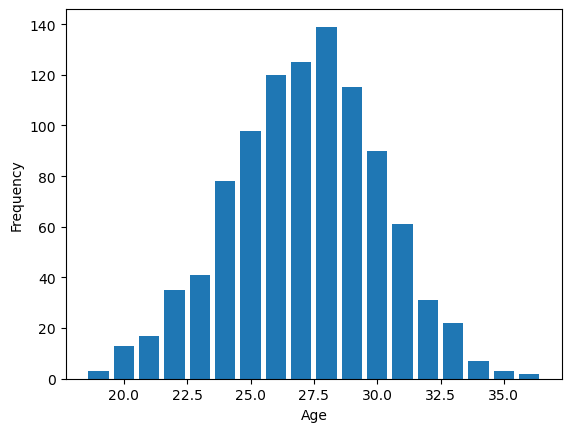

In [91]:
ages_population_2 = pd.read_csv("ages_population2.csv")
ages_population_2

freq_distribution = ages_population_2["observation"].value_counts()

plt.bar(freq_distribution.index, freq_distribution.values)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
Yes, there are difference

"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [94]:
mean = ages_population_2["observation"].mean()
print(f"The mean for population 2 is {mean}")

std_dev = ages_population_2["observation"].std()
print(f"The standard deviation for population 2 is {std_dev}")

mean = ages_population["observation"].mean()
print(f"The mean for population is {mean}")

std_dev = ages_population["observation"].std()
print(f"The standard deviation for population is {std_dev}")


The mean for population 2 is 27.155
The standard deviation for population 2 is 2.969813932689186
The mean for population is 36.56
The standard deviation for population is 12.816499625976762


In [ ]:
"""
The overall pattern of the distribution remains consistent, although the dataset comprises distinct observation values.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

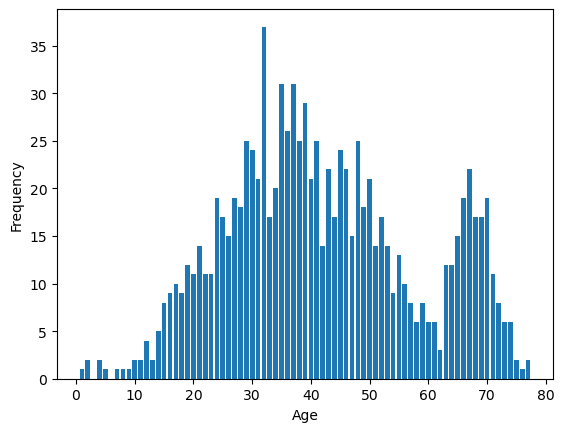

In [99]:
ages_population_3 = pd.read_csv("ages_population3.csv")
ages_population_3

freq_distribution = ages_population_3["observation"].value_counts()

plt.bar(freq_distribution.index, freq_distribution.values)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [100]:
mean = ages_population_3["observation"].mean()
print(f"The mean for population 3 is {mean}")

std_dev = ages_population_3["observation"].std()
print(f"The standard deviation for population 3 is {std_dev}")

mean = ages_population["observation"].mean()
print(f"The mean for population 1 is {mean}")

std_dev = ages_population["observation"].std()
print(f"The standard deviation for population 1 is {std_dev}")

The mean for population 3 is 41.989
The standard deviation for population 3 is 16.144705959865934
The mean for population 1 is 36.56
The standard deviation for population 1 is 12.816499625976762


In [ ]:
"""
The mean for population 3 (41.989) is higher than the mean for population 1 (36.56).
This suggests that, on average, the values in population 3 tend to be larger than those in population 1.

The standard deviation for population 3 (16.144705959865934) is larger than the standard deviation for population 1 (12.816499625976762). 
A larger standard deviation indicates that the values in population 3 are more spread out from the mean compared to those in population 1.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [105]:
q1 = np.quantile(ages_population_3, 0.25)
print(f"The first quartile is {q1}")
q2 = np.quantile(ages_population_3, 0.50)
print(f"The second quartile is {q2}")
q3 = np.quantile(ages_population_3, 0.75)
print(f"The third quartile is {q3}")
q4 = np.quantile(ages_population_3, 1)
print(f"The fourth quartile is {q4}")

The first quartile is 30.0
The second quartile is 40.0
The third quartile is 53.0
The fourth quartile is 77.0


In [106]:
ages_population_3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [107]:
ages_population_3.median()

observation    40.0
dtype: float64

In [109]:
ages_population_3.skew()

observation    0.210389
dtype: float64

In [ ]:
"""
The median and the mean exhibit minimal disparity, indicating that the distribution is nearly balanced around a central point.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [110]:
p10 = np.percentile(ages_population_3, 10)
p90 = np.percentile(ages_population_3, 90)

print(f"The 10th percentile is {p10}")
print(f"The 90th percentile is {p90}")

The 10th percentile is 22.0
The 90th percentile is 67.0


In [ ]:
"""
The 10th percentile (p10) represents the value below which 10% of the data falls. 
It provides an idea of the lower range of ages in your dataset.
The 90th percentile (p90) represents the value below which 90% of the data falls. 
It gives insight into the upper range of ages in your dataset.
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

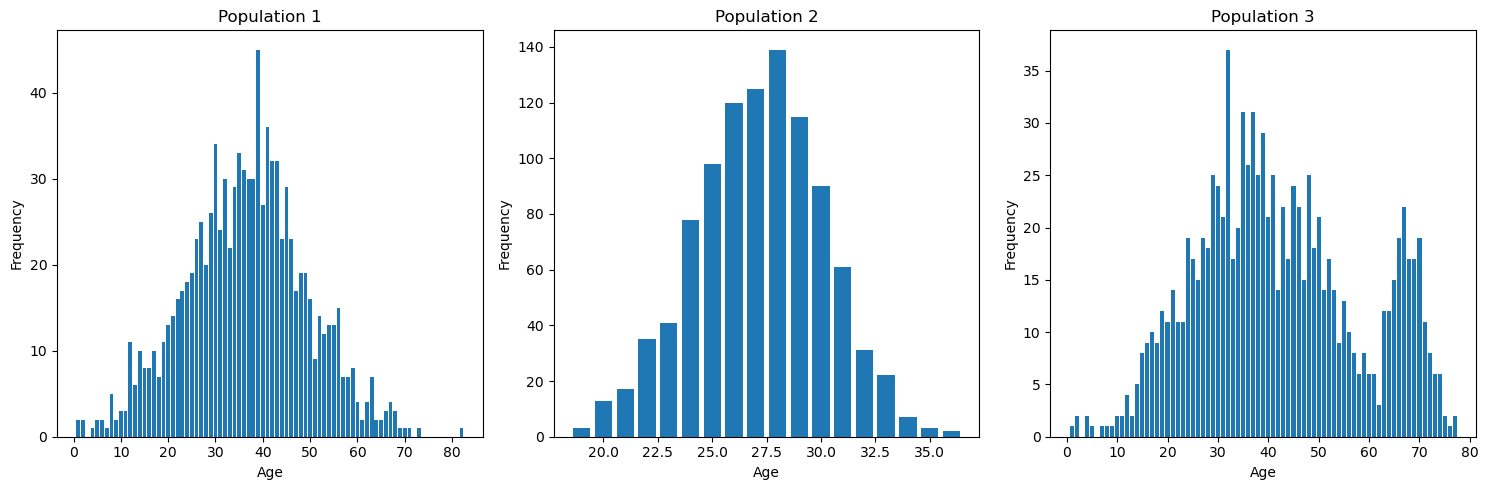

In [113]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot for Population 1
freq_distribution = ages_population["observation"].value_counts()
axes[0].bar(freq_distribution.index, freq_distribution.values)
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Population 1")

# Plot for Population 2
freq_distribution = ages_population_2["observation"].value_counts()
axes[1].bar(freq_distribution.index, freq_distribution.values)
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Population 2")

# Plot for Population 3
freq_distribution = ages_population_3["observation"].value_counts()
axes[2].bar(freq_distribution.index, freq_distribution.values)
axes[2].set_xlabel("Age")
axes[2].set_ylabel("Frequency")
axes[2].set_title("Population 3")


plt.tight_layout()
plt.show()



In [125]:
comparison_df = pd.concat([ages_population.describe(),
                            ages_population_2.describe(),
                            ages_population_3.describe()],
                            axis=1)
comparison_df.columns = ['Population 1', 'Population 2', 'Population 3']
comparison_df

,Population 1,Population 2,Population 3
count,1000.0000,1000.000000,1000.000000
mean,36.5600,27.155000,41.989000
std,12.8165,2.969814,16.144706
min,1.0000,19.000000,1.000000
25%,28.0000,25.000000,30.000000
50%,37.0000,27.000000,40.000000
75%,45.0000,29.000000,53.000000
max,82.0000,36.000000,77.000000


In [ ]:
"""
###Similarities:
##Count: All three neighborhoods have the same count of 1000 residents each.
##Central Tendency (Mean and Median):The mean population values differ across the neighborhoods, with Population 3 having the highest mean, followed by Population 1, and then Population 2. 
However, the median population values are relatively close, with Population 1 having the highest median, followed by Population 3, and then Population 2.
##Interquartile Range (IQR): The IQR, represented by the difference between the 25th and 75th percentiles, varies among the neighborhoods, but the general range is somewhat consistent. Population 2 has the narrowest IQR, while Population 3 has the widest.

###Differences:
##Population Range: Population 1 has the highest maximum population (82), while Population 2 has the lowest maximum population (36). Population 3 falls in between. This suggests that Population 1 is the most populous, followed by Population 3 and then Population 2.
##Spread (Standard Deviation): Population 3 has the highest standard deviation (16.144706), indicating greater variability or spread in its population distribution. 
Population 2 has the lowest standard deviation, implying that its population is more clustered around the mean.
##Minimum Population: Population 1 and Population 3 have a minimum population of 1, while Population 2 has a minimum population of 19.
##Upper Quartile (75th Percentile): Population 3 has the highest upper quartile value (53), indicating that 75% of its population falls below this value. This suggests a larger upper segment of the population in Population 3 compared to the other two neighborhoods.

###Conclusion:

In conclusion, these three neighborhoods exhibit both similarities and differences in their population distributions. 
While they have the same count and relatively similar median values, they differ in terms of their mean, spread, range, and upper quartile values. 


In conclusion, the three populations (neighborhoods) exhibit differences in their central tendency, dispersion, distribution spread, and quartiles.
These statistics offer valuable insights into the demographic characteristics of these neighborhoods, which could be useful for decision-making and further analysis.

"""